# **APRENDIZAJE AUTOMATICO - TP 1** 💻

> 🙋🏻‍♂️ **Juan Andres Garcia Alves de Borba** (DNI 30182100)

## Indicaciones básicas

1. Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

2. Cada uno debe completar las consignas indicadas en este notebook.

3. No pueden repetir el mismo dataset que ya haya definido un compañero.

4. Copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5. No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6. Además de todo el código que agregue, es importante que sepa interpretarlo.  
Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio/parcial.

7. Revise las fecha límite de entrega de este trabajo.

## Entrega

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


# **Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  

**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

## 📌 Punto 1. **Selección del Dataset**

- Elijan un dataset de UCI ML Repository del siguiente enlace:  
https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  

- Requisitos:
  - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
  - Idealmente, que las features tengan distintas escalas o unidades (no excluyente).
  - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
  - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.

### Resolución:

👉🏻 Me basaré en el dataset **Energy Efficiency**.  
> https://archive.ics.uci.edu/dataset/242/energy+efficiency.

👉🏻 Instalaciones ...

In [ ]:
!pip install ucimlrepo

👉🏻 Importación de librerías y configuraciones generales ...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# mayor ancho en el print() antes que se genere un salto de línea
np.set_printoptions(linewidth=130)    # saltos de línea (otra opción: linewidth=np.inf)
np.set_printoptions(edgeitems=100)    # mostrar más elementos al principio y final
np.set_printoptions(threshold=np.inf) # ancho para los arrays (otra opción: np.inf)

👉🏻 Cargar el dataset ...

In [ ]:
# fetch de dataset
energy_efficiency = fetch_ucirepo(id=242)

👉🏻 Mostrar las descripciones de cada columna...

In [ ]:
# información de los datos
print(energy_efficiency.variables)

  name     role        type demographic                description units  \
0   X1  Feature  Continuous        None       Relative Compactness  None   
1   X2  Feature  Continuous        None               Surface Area  None   
2   X3  Feature  Continuous        None                  Wall Area  None   
3   X4  Feature  Continuous        None                  Roof Area  None   
4   X5  Feature  Continuous        None             Overall Height  None   
5   X6  Feature     Integer        None                Orientation  None   
6   X7  Feature  Continuous        None               Glazing Area  None   
7   X8  Feature     Integer        None  Glazing Area Distribution  None   
8   Y1   Target  Continuous        None               Heating Load  None   
9   Y2   Target  Continuous        None               Cooling Load  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7          

👉🏻 Obtener los features y los targets ...

In [ ]:
# variables 'X' e 'y' para los features y los targets
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# individualizo además los 2 target disponibles (me simplifica las cosas más adelante)
y1 = y['Y1']  # columna 'heating load'
y2 = y['Y2']  # columan 'cooling load'

# los combino en un único dataframe (también me sirve luego)
df = pd.concat([X, y], axis=1)

👉🏻 Inspección inicial ...

In [ ]:
print(X.head(3), '\n')  # features (top 3)
print(y.head(3))        # targets (top 3)

     X1     X2     X3      X4   X5  X6   X7  X8
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0 

      Y1     Y2
0  15.55  21.33
1  15.55  21.33
2  15.55  21.33


👉🏻 Chequeo por nulos ...

In [ ]:
# en lugar de hacer 'X.isnull().sum()', uso 'X.isnull().sum().values' que resulta más compacto de visualizar
print('nulos en X:', X.isnull().sum().values)
print('nulos en y:', y.isnull().sum().values)

nulos en X: [0 0 0 0 0 0 0 0]
nulos en y: [0 0]


👉🏻 Chequeo por duplicados ...

In [ ]:
print('duplicados en X:', X.duplicated().sum())

duplicados en X: 0


👉🏻 Columnas calculadas y conversión de formatos ...

In [ ]:
# no aplica

## 🔎 Punto 2. **Análisis Exploratorio de Datos**

- Describan las variables (media, distribución, outliers).  

- Visualizen:  
  - Histogramas o boxplots para ver distribuciones.  
  - Gráficos de dispersión (scatterplots) entre features y target.  

- **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?

### Resolución:

👉🏻 Media, desviación estadar, mínimo, máximo ...

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


👉🏻 Búsqueda de Outliers (mediante z-score) ...

In [ ]:
# calcular el z-score
z_scores = (df - df.mean()) / df.std()

# detectar outliers (valores mayores a 3 sigmas, el 99% de los datos)
outliers_z = np.abs(z_scores) > 3

# mostrar outliers
print('conteo de outliers para cada columna:', outliers_z.sum().values)  # sin outliers

conteo de outliers para cada columna: [0 0 0 0 0 0 0 0 0 0]


👉🏻 Histogramas para ver las distribuciones ...

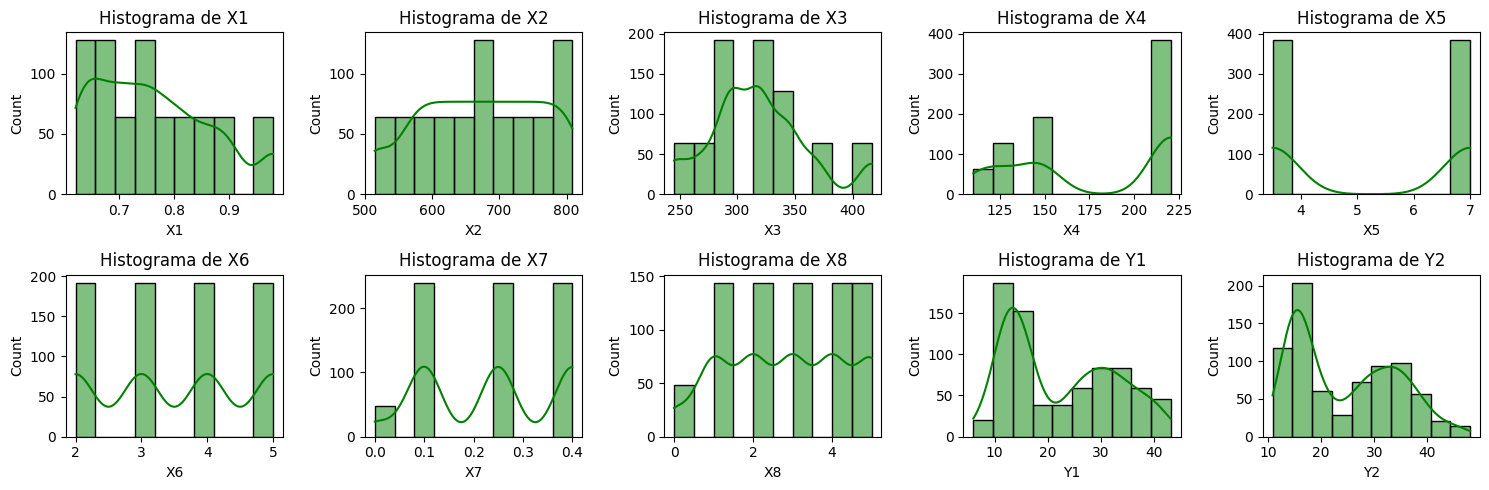

In [ ]:
# primero los histogramas... uso un único gráfico para ver todo
plt.figure(figsize=(15, 5))                               # tamaño de la figura

# iterar sobre las columnas para dibujar un histograma para cada una
for i, col in enumerate(df.columns):
  plt.subplot(2, 5, i+1)                                  # 2 filas, 5 columnas, nro de sub-gráfico
  sns.histplot(df[col], kde=True, bins=10, color='green') # histograma + KDE (estimación de densidad)
  plt.title(f'Histograma de { col }')
  plt.tight_layout()                                      # diseño compacto

plt.show()

> 👁️‍🗨️ Observo que los features `X4` (Roof Area) y `X5` (Overall Height) tienen su distribuciones sumamente desbalanceadas.

> 👁️‍🗨️ No es el caso con `X6` (Orientation) y `X7` (Glazing Area), pareciera que sí en un vistazo rápido, pero aquí las barras se muestran separadas porque elegí `bins=10` y estos features presentan un rango de valores muy acotado.

> 👁️‍🗨️ De todos los features, salvo `X3` (Wall Area), el resto no sigue una distribución normal.

> 👁️‍🗨️ Aunque la estandarización (vs normalización) funcione mejor con datos con distribución normal (que no es este caso)... tampoco me queda otra opción, dado que el algoritmo de regresión lineal asume el uso de datos estandarizados.  

La última observación esta basada en ChatGPT...  
"Estandarización vs Normalización. Recomendación de uso para aplicar a una Regresión Lineal y porqué." (prompt)

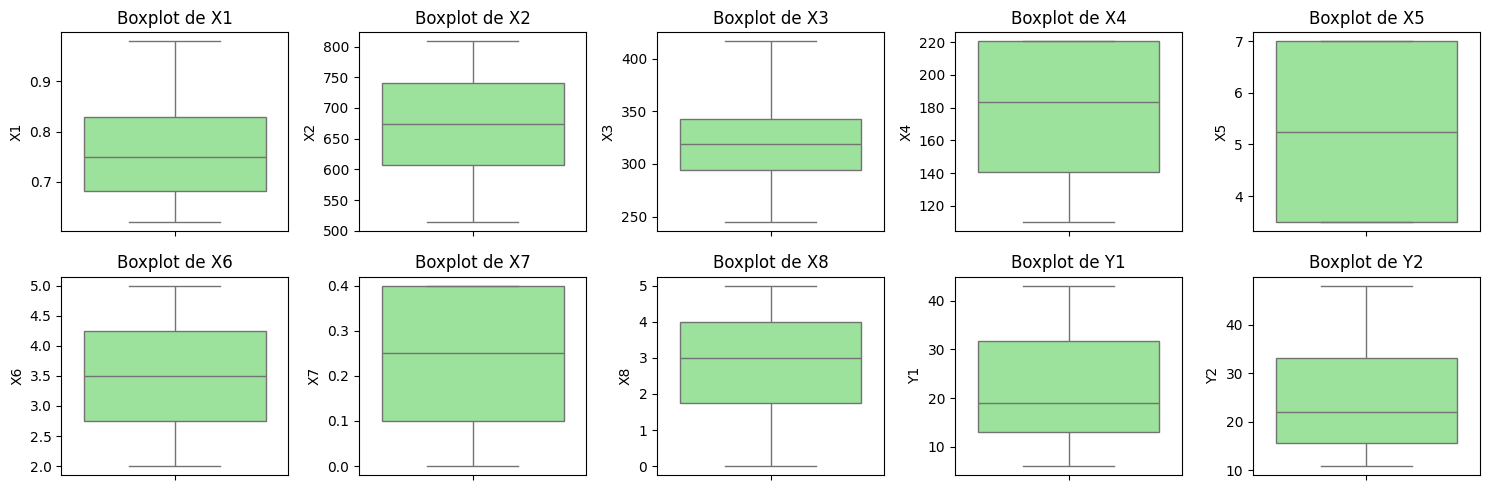

In [ ]:
# luego los box-plot... uso un único gráfico para ver todo
plt.figure(figsize=(15, 5))                               # tamaño de la figura

# iterar sobre las columnas para dibujar un boxplot para cada una
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i+1)                                # 2 filas, 5 columnas, nro de sub-gráfico
    sns.boxplot(df[col], color='lightgreen')              # boxplot
    plt.title(f'Boxplot de { col }')
    plt.tight_layout()                                    # diseño compacto

plt.show()

> 👁️‍🗨️ Ya de los histogramas se podía esperar que el feature `X4` (Roof Area) presentara todos sus observaciones dentro de la caja.

> 👁️‍🗨️ Adicional a la búsqueda previa mediante el z-score, de los box-plots también se observa la ausencia outliers.

👉🏻 Pequeña **disgregación**: pruebo un pairplot de seaborn (visto en clase) como una primera aproximación de correlaciones entre los features ...

👉🏻 Me servirán luego al momento de "jugar", probando con distintas **combinaciones de features** para la regresión lineal.

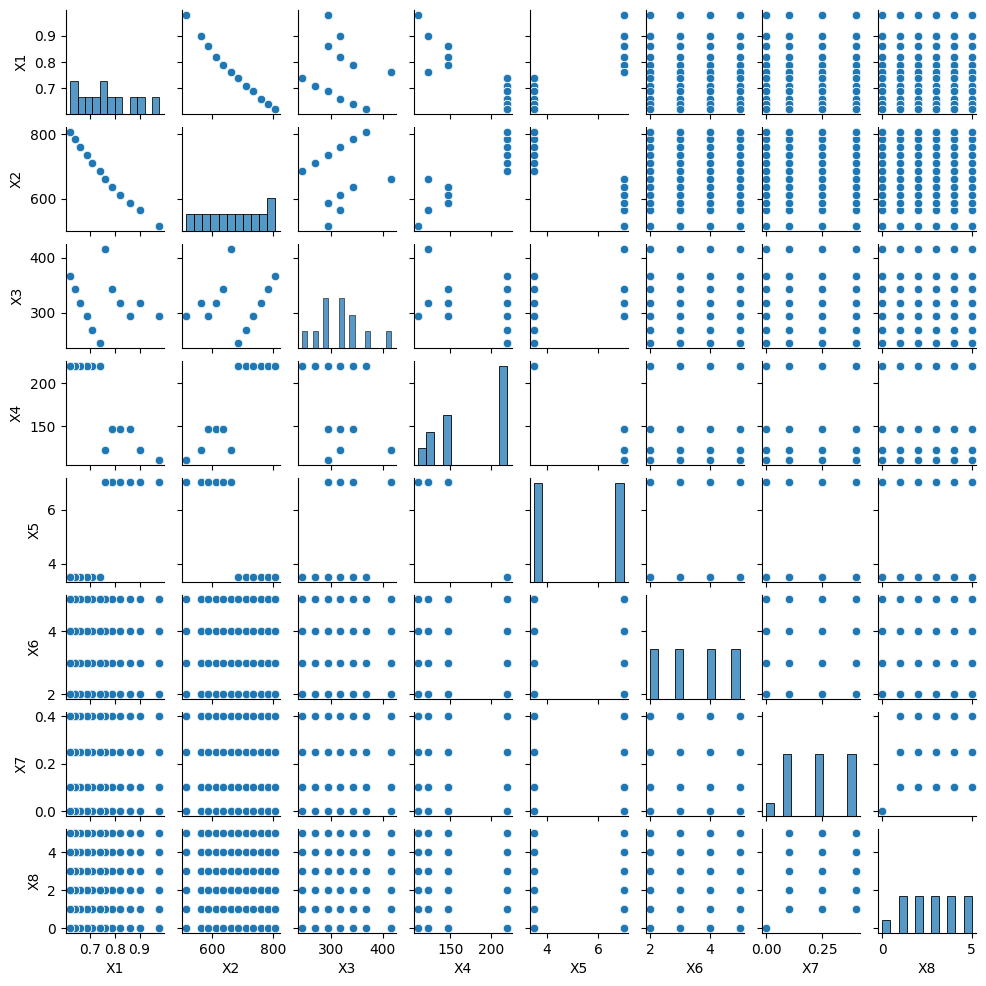

In [ ]:
# el height=1.25 achica el tamaño de los sub-gráficos...
# así entra todo en el output de la celda, evitando el scroll vertical
sns.pairplot(X, height=1.25)    # visto en la clase #05
plt.show()

> 👁️‍🗨️ Pareciera haber una:
  - fuerte **correlación** lineal (negativa) entre `X1` (Relative Compactness) y `X2` (Surface Area)
  - fuerte **correlación** lineal entre `X2` (Relative Compactness) y `X4` (Roof Area)
  - y tal vez una **correlación** lineal débil entre `X2` (Surface Area) y `X3` (Wall Area)

👉🏻 A ver en un mapa de calor ...

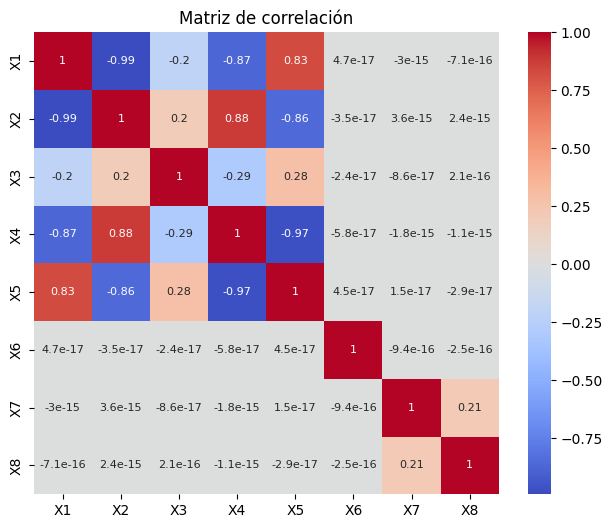

In [ ]:
correlation = X.corr()    # visto en la clase #02

plt.figure(figsize=(7.5, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de correlación')
plt.show()

> 👁️‍🗨️ Las cuentas, a diferencia de la inspección visual, no deja lugar a dudas...
- `X1` con `X2`, `X4` y `X5`
- `X2` con `X4` y `X5`
- `X4` con `X5`

👉🏻 **Retomo** a los gráficos de dispersión entre **features y targets** ...

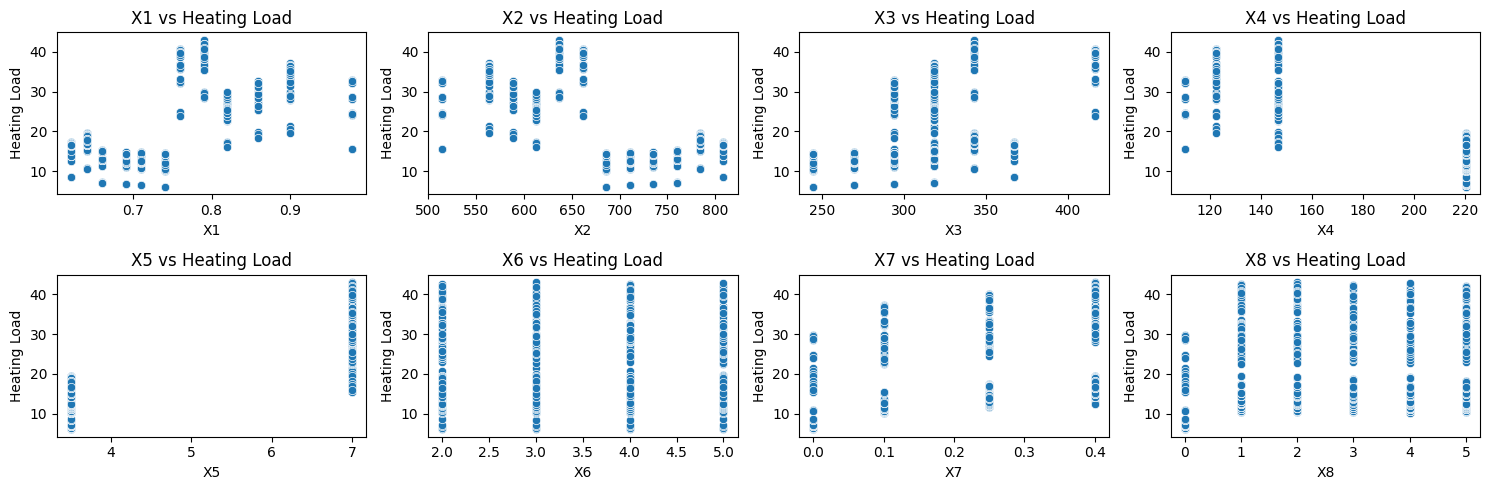

In [ ]:
# crear gráficos de dispersión entre los features y el target 'y1' (heating load)
plt.figure(figsize=(15, 5))                               # tamaño de la figura

# Graficar cada feature contra y1 (Heating load)
for i, col in enumerate(X.columns):
    plt.subplot(2, 4, i+1)                                # 2 filas, 4 columnas, nro de sub-gráfico
    sns.scatterplot(x=X[col], y=y1)                       # gráfico de dispersión, y1 = Heating load
    plt.title(f'{ col } vs Heating Load')
    plt.xlabel(col)
    plt.ylabel('Heating Load')
    plt.tight_layout()                                    # diseño compacto

plt.show()

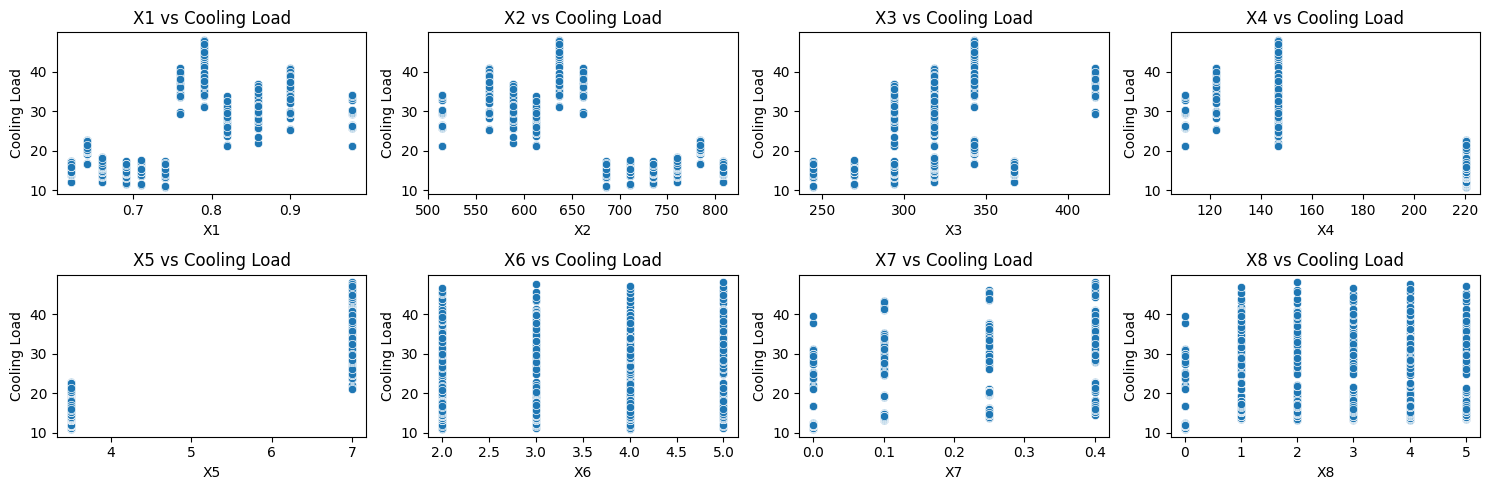

In [ ]:
# crear gráficos de dispersión entre los features y el target 'y2' (cooling load)
plt.figure(figsize=(15, 5))                               # tamaño de la figura

# Graficar cada feature contra y2 (Cooling load)
for i, col in enumerate(X.columns):
    plt.subplot(2, 4, i+1)                                # 2 filas, 4 columnas, nro de sub-gráfico
    sns.scatterplot(x=X[col], y=y2)                       # gráfico de dispersión, y2 = Cooling load
    plt.title(f'{col} vs Cooling Load')
    plt.xlabel(col)
    plt.ylabel('Cooling Load')
    plt.tight_layout()                                    # diseño compacto

plt.show()

> 👁️‍🗨️ En cuanto a las relaciones lineales preliminares... una decepción... tal vez `X1`, `X2` y `X3` sirvan de algo. 🤷🏻‍♂️

👉🏻 De los gráficos de dispersión anteriores no obtuve nada concluyente... mejor con un mapa de calor (+ anotaciones) ...

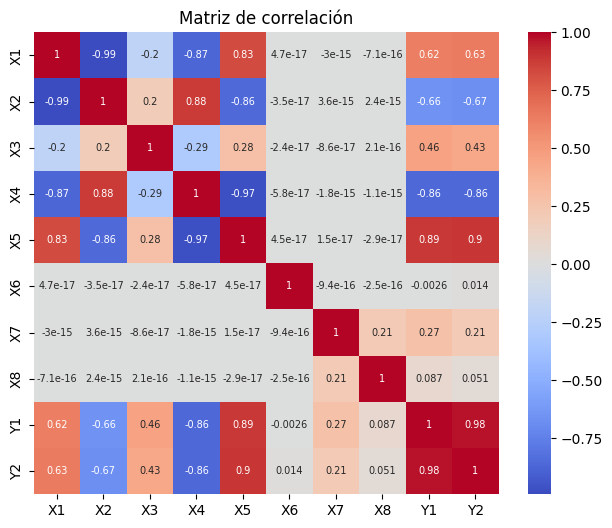

In [ ]:
correlation = df.corr()    # visto en la clase #02

plt.figure(figsize=(7.5, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 7})
plt.title('Matriz de correlación')
plt.show()

> 👁️‍🗨️ ¡Ahora sí! ... en los gráficos previos no visualicé las **fuertes** corelaciones adicionales existentes entre `X4` (Roof Area) y `X5` (Overall Height) con ambos `target`. 😄

## ✂️ Punto 3. **Preprocesamiento**

- Limpieza 1: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  

- Limpieza 2: Indique cuáles features descarta. Justifique.

- Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.

- Escalen las features (p. ej. StandardScaler) para comparar coeficientes después.  

- Dividan en train/test (70-30 o 80-20).

### Resolución:

👉🏻 Limpieza 1 ...

- Chequo de nulos: el dataset no presenta valores nulos (ya hice el chequeo a continuación de la carga del dataset, previo al EDA).
- Outliers: el dataset no presenta outliers.

👉🏻 Limpieza 2 ...

- De la 'matriz de correlacion' en el EDA, observo que los features `X7` (Glazing Area), y luego los `X6` (Orientation), y `X8` (Glazing Area Distribution) presentan una muy baja y casi-nula correlación con los target, respectivamente. Procedo a su descarte.

In [ ]:
# en lugar de eliminar columnas, "retener" las de los features de interés
X = X[['X1','X2','X3','X4','X5']]
X.head(3)

# variante, pero no me gusta porque genera error al ejecutar la celda por 2da vez
# X = X.drop(columns=['X7', 'X6', 'X8'])

,X1,X2,X3,X4,X5
0,0.98,514.5,294.0,110.25,7.0
1,0.98,514.5,294.0,110.25,7.0
2,0.98,514.5,294.0,110.25,7.0


👉🏻 Uso de variables categóricas ...

- El dataset no dispone de variables categóricas.
- Nota: de tenerlas debería haber procedido a usar One-Hot-Encoding o Labeling-Encoding... de hecho las features `X6` y `X8` descartadas 2 pasos atrás bien podría haber sido el resultado de un Labeling-Encoding.

👉🏻 Escalado de los features ...

- Como comenté en una de las observaciones durante el EDA, utilizaré `Estandarización` (no así normalización) ya que esta distribuye los datos en el cero +/- una desviación estandar. Lo cual resulta idóneo para la `Regresión lineal`.

In [ ]:
X_std = StandardScaler().fit_transform(X)   # estandarizacion
print(X_std[:5])                            # una muestra

[[ 2.0418 -1.7859 -0.562  -1.4701  1.    ]
 [ 2.0418 -1.7859 -0.562  -1.4701  1.    ]
 [ 2.0418 -1.7859 -0.562  -1.4701  1.    ]
 [ 2.0418 -1.7859 -0.562  -1.4701  1.    ]
 [ 1.285  -1.2292  0.     -1.1987  1.    ]]


👉🏻 División del dataset en train/test (80-20) ...

- A partir de este punto prosigo con uno solo de los dos target (`y1`/`y2`)... tras el EDA no encuentro ningún motivo para preferir a uno por sobre el otro... elijo a `y1` de forma arbitraria.

In [ ]:
# dividir el dataset 80/20 (uso de 'X_std' e 'y1')
X_train, X_test, y_train, y_test = train_test_split(X_std, y1, test_size=0.2, random_state=1324)

## 📈 Punto 4. **Regresión Lineal**

- Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  

- Obtengan:  
  - Coeficientes (pesos) del modelo.  
  - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio) y MAE.

### Resolución:

👉🏻 Entrenando al modelo ...

In [ ]:
# arrays en decimales (evitar la notación científica)
np.set_printoptions(precision=4, suppress=True)

# ajustar el modelo
linear_regression = LinearRegression()    # crear la instancia
linear_regression.fit(X_train, y_train)   # regresión lineal

# obtener los coeficientes
print('Coeficientes:', linear_regression.coef_)                 # los pesos
print('Term. Indep.:', round(linear_regression.intercept_, 4))  # el término independiente

# predicciones (conj. de entrenamiento y conj. de prueba)
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)

Coeficientes: [-6.3097 -3.3811  0.7573 -3.6627  7.4015]
Term. Indep.: 22.2245


👉🏻 Cálculo de las métricas ...

In [ ]:
# métricas del conj. de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Conj. de entrenamiento:')
print(f'- MAE: { round(mae_train, 4) }')
print(f'- RSE: { round(mse_train, 4) }')
print(f'- R2:  { round(r2_train, 4) }\n')

# métricas del conj. de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Conj. de prueba:')
print(f'- MAE: { round(mae_test, 4) }')
print(f'- MSE: { round(mse_test, 4) }')
print(f'- R2:  { round(r2_test, 4) }')

Conj. de entrenamiento:
- MAE: 3.0207
- RSE: 16.4282
- R2:  0.8349

Conj. de prueba:
- MAE: 2.9216
- MSE: 14.5107
- R2:  0.867


> 👁️‍🗨️ Observo primeramente que las métricas sobre ambos conjuntos son similares, lo cual es una **buena señal** de que el modelo no tenga overfitting sobre el conjunto de entrenamiento, y que generaliza bastante bien cuando es expuesto a nuevos datos. 😃

> 👁️‍🗨️ Respecto a las métricas en sí: considero que ambas R^2 entre 0.83-0.87 son un indicador de un buen modelo (este es capaz de explicar hasta el 86.7% de la varianza en los datos)

## 💰 Punto 5. **Importancia de Variables**

- Analicen los **coeficientes** del modelo:  
  - Valores absolutos altos → mayor impacto en el target.  
  - Signo: Relación positiva/negativa con el target.  

- Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  

- **5.1. Opcional**:
  Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  

  - **Permutation Importance** (de sklearn) para validar importancia.  
  Más info en https://scikit-learn.org/stable/modules/permutation_importance.html

### Resolución:

👉🏻 Análisis de los coeficientes del modelo ...

> 👁️‍🗨️ Dado que `X1`, `X2`, `X4` y `X5` tienen una mayor magnitud (valor absoluto), esto sugiere que estos features tienen el mayor impacto en la predicción del target.

> 👁️‍🗨️ Los valores negativos de `X1` y `X2` implican una relación inversa entre estos features y el target.

> 📄 Coeficientes: [-6.3097 -3.3811  0.7573 -3.6627  7.4015]

👉🏻 Comparación (gráfica) de las magnitudes ...

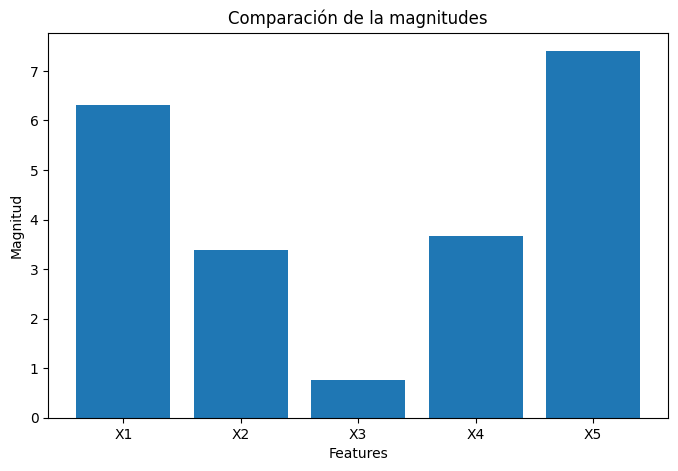

In [ ]:
# fundamental el np.abs() para compara la magnitud
coef = np.abs(linear_regression.coef_)

# gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(X.columns, coef)
plt.title('Comparación de la magnitudes')
plt.xlabel('Features')
plt.ylabel('Magnitud')
plt.show()

👉🏻 (opcional) "desordenar" un feature y ver que pasa 🤭 ...

La documentación oficial indica que esta técnica es particularmente útil para modelos **no-lineales**, pero ya que estamos...

In [ ]:
# codigo tomado de la documentación oficial (adaptado)
r = permutation_importance(linear_regression, X_test, y_test, n_repeats=30, random_state=1324)

for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{X.columns[i]:<8} {r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")

X5       1.070 +/- 0.091
X1       0.724 +/- 0.052
X4       0.286 +/- 0.032
X2       0.244 +/- 0.024
X3       0.014 +/- 0.003


> 👁️‍🗨️ Los features `X5` y `X1` tendrían importancia media lo que significa que, cuando se permutan sus valores (se mezclan aleatoriamente), el modelo pierde 1.07 unidades de precisión en la predicción.  
> Nota: le pedí a ChatGPT que me ayude a interpretar los resultados.

## 💡 Punto 6. **Reflexión**

- ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?

- ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?


### Resolución:

👉🏻 Importacia de las variables ...

> 👁️‍🗨️ Dado que los features fueron previamente **estandarizados** antes de proceder a entrenar el modelo, del listado de coeficientes (Punto 4) observo que `X1` (Relative Compactness) y `X5` (Overall Height) son las features que tiene un mayor impacto según el modelo.

> 👁️‍🗨️ Le siguen `X2` (Surface Area) y `X4` (Roof Area) con una importancia de segundo orden.

> 👁️‍🗨️ En el caso de `X3` (Wall Area) me imagino que se podría probar de quitar del modelo (y re-evaluar luego), posiblemente sin mayor impacto.

> 👁️‍🗨️ Curiosamente, **no** me coincidió mayormente con el EDA, donde estimé a `X4` (Roof Area) y `X5` (Overall Height) como las features más importantes, seguidas en un segundo orden de importancia por `X1`, `X2` y `X3`.

> 📄 Coeficientes: [-6.3097 -3.3811  0.7573 -3.6627  7.4015]


👉🏻 Rendimiento del modelo ...

> Hago un recap de las observaciones que dejé en el Punto 4, al pie de las métricas:

> 👁️‍🗨️ las métricas sobre ambos conjuntos son similares, lo cual es una **buena señal** de que el modelo no tenga overfitting y que generaliza bastante bien cuando es expuesto a nuevos datos.

> 👁️‍🗨️ Respecto a las métricas en sí: considero que ambas RSE bajas, y con la R^2 entre 0.83-0.86 son un indicador de un buen modelo.


## ⭐ Punto 7. **Bonus**

- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?

### Resolución:

👉🏻 Removiendo la variable que en el Punto 6 consideré como "poco importante" ...

In [ ]:
X_bonus = X[['X1','X2','X4','X5']]  # descartar 'X3'
X_bonus.head(3)

,X1,X2,X4,X5
0,0.98,514.5,110.25,7.0
1,0.98,514.5,110.25,7.0
2,0.98,514.5,110.25,7.0


In [ ]:
X_bonus_std = StandardScaler().fit_transform(X_bonus)   # estandarizacion
print(X_bonus_std[:5])                                  # muestra

[[ 2.0418 -1.7859 -1.4701  1.    ]
 [ 2.0418 -1.7859 -1.4701  1.    ]
 [ 2.0418 -1.7859 -1.4701  1.    ]
 [ 2.0418 -1.7859 -1.4701  1.    ]
 [ 1.285  -1.2292 -1.1987  1.    ]]


👉🏻 Re-entrenando el modelo (copy & paste de parte del Punto 4) ...

In [ ]:
# dividir el dataset 80/20 (uso de 'X_bonus_std' e 'y1')
X_train, X_test, y_train, y_test = train_test_split(X_bonus_std, y1, test_size=0.2, random_state=1324)

In [ ]:
# ajustar el modelo
linear_regression_bonus = LinearRegression()    # crear la instancia
linear_regression_bonus.fit(X_train, y_train)   # regresión lineal

# obtener los coeficientes
print('Coef. antes :', linear_regression.coef_)                       # los pesos previos
print('Coef. ahora :', linear_regression_bonus.coef_)                 # los pesos nuevos
print('Term. Indep.:', round(linear_regression_bonus.intercept_, 4))  # el término independiente

# predicciones (conj. de entrenamiento y conj. de prueba)
y_train_pred = linear_regression_bonus.predict(X_train)
y_test_pred = linear_regression_bonus.predict(X_test)

Coef. antes : [-6.3097 -3.3811  0.7573 -3.6627  7.4015]
Coef. ahora : [-6.3097 -1.8521 -5.2307  7.4015]
Term. Indep.: 22.2245


In [ ]:
# métricas del conj. de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Conj. de entrenamiento:')
print(f'- MAE: { round(mae_train, 4) }')
print(f'- RSE: { round(mse_train, 4) }')
print(f'- R2:  { round(r2_train, 4) }')

# métricas del conj. de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print()
print('Conj. de prueba:')
print(f'- MAE: { round(mae_test, 4) }')
print(f'- MSE: { round(mse_test, 4) }')
print(f'- R2:  { round(r2_test, 4) }')

Conj. de entrenamiento:
- MAE: 3.0207
- RSE: 16.4282
- R2:  0.8349

Conj. de prueba:
- MAE: 2.9216
- MSE: 14.5107
- R2:  0.867


> 👁️‍🗨️ Nuevamente las métricas sobre ambos conjuntos de datos resultaron similares 😃.  

> 👁️‍🗨️ En la siguiente tabla, se puede apreciar una comparativa sobre la métrica R^2, la cual tras eliminar la feature `X3` con un peso casi marginal [0.7573] del modelo, no se vió afectada.

> | Conjunto       | 5 features | 4 features |
> |----------------|------------|------------|
> | Entrenamiento  |     0.8349 |     0.8349 |
> | Prueba         |     0.8670 |     0.8670 |

> 👁️‍🗨️ Sí observo que cambiaron los coeficientes para `X2`, `X4`, "absorbiendo" el peso de `X3` entre ellas.  
Para mi sorpresa `X1`, `X5` no se vieron afectadas (al menos a 4 decimales de precisión).

</br>  
---

## ❗ **Tips**:  

- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).

- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!